## Importing Libraries

In [ ]:
!pip install matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (5, 5)

In [ ]:
data = pd.read_csv(r"/content/healthcare-dataset-stroke-data.csv")

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

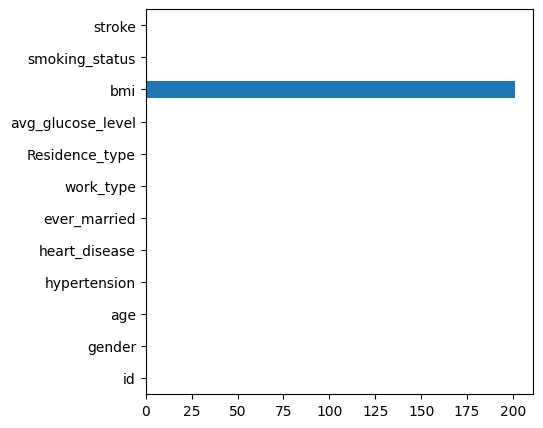

In [ ]:

# Printing the number of N/A values in eacg column
print(data.isna().sum())
# Graphical representation of the na values present in the attribute - bar graph
data.isna().sum().plot.barh()

#  Fill Null Values

In [ ]:
data['bmi'].value_counts()

,count
bmi,
28.7,41
28.4,38
26.7,37
27.6,37
26.1,37
...,...
48.7,1
49.2,1
51.0,1


In [ ]:
data['bmi'].describe()

,bmi
count,4909.000000
mean,28.893237
std,7.854067
min,10.300000
25%,23.500000
50%,28.100000
75%,33.100000
max,97.600000


In [ ]:
# filling the null values in the dataset
data['bmi'].fillna(data['bmi'].mean(), inplace = True)

<ipython-input-1401-1e195bd9c4cb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(), inplace = True)


In [ ]:
data['bmi'].describe()

,bmi
count,5110.000000
mean,28.893237
std,7.698018
min,10.300000
25%,23.800000
50%,28.400000
75%,32.800000
max,97.600000


In [ ]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
data.drop('id',axis=1, inplace= True)

In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# **Target feature - Stroke**


*   Stroke analysis





In [ ]:
# Value count in the stroke attribute
data['stroke'].value_counts()

,count
stroke,
0,4861
1,249


<Axes: xlabel='stroke'>

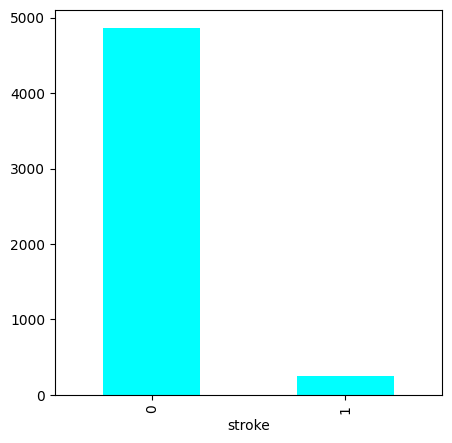

In [ ]:
# Graphical representation of the value count distribution of the target attribute
data['stroke'].value_counts().plot(kind="bar",color = "cyan")

In [ ]:
print("% of people who actualy got a stroke : ",(data['stroke'].value_counts()[1]/data['stroke'].value_counts().sum()).round(3)*100)

% of people who actualy got a stroke :  4.9


Our dataset is highly skewed since only around 5% of the instances got stroke

# Outlier Removal

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

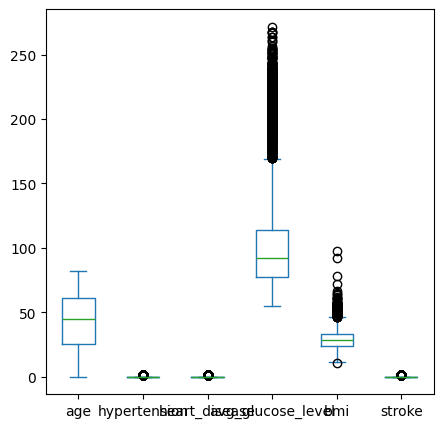

In [ ]:
data.plot(kind='box')
plt.show()

# Attributes compared with target attibute : Stroke

<Axes: xlabel='stroke', ylabel='count'>

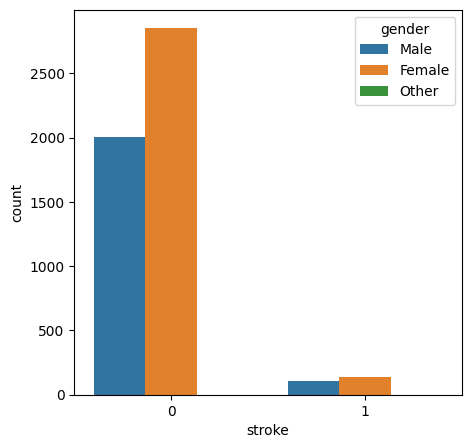

In [ ]:
# Comparing stroke with gender
sns.countplot(x='stroke', hue='gender', data=data)

<Axes: xlabel='stroke', ylabel='count'>

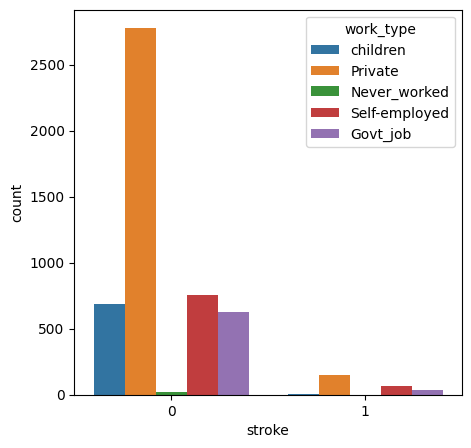

In [ ]:
# Comparing stroke with work-type
sns.countplot(x='stroke', hue='work_type', data=data)

Based on this comparison we see in the provided dataset that people who never
worked never got a heart attack and the people who are privetly employed got more strokes

<Axes: xlabel='stroke', ylabel='count'>

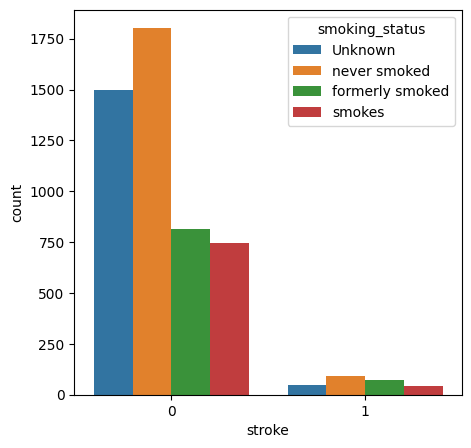

In [ ]:
# Comparing stroke with somking_status
sns.countplot(x='stroke', hue='smoking_status', data=data)

Based on the plot we can that those who formerly smoked got more strokes The people who smoked and never smoked has a somewhat same probability of getting stroke

<Axes: xlabel='stroke', ylabel='count'>

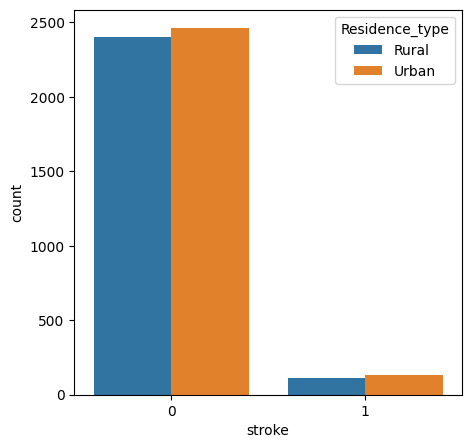

In [ ]:
# Comparing stroke with residence type
sns.countplot(x='stroke', hue='Residence_type', data=data)

Based on the analysis the people who live in Urban areas were reported with more strokes

<Axes: xlabel='stroke', ylabel='count'>

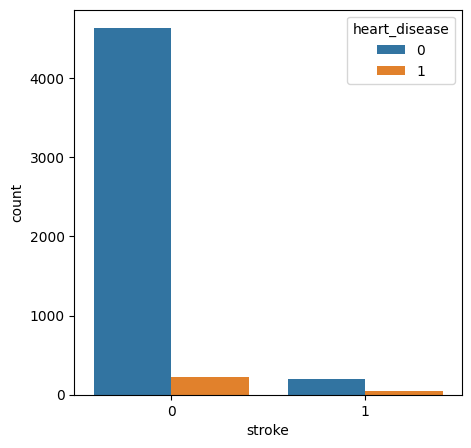

In [ ]:
# Comparing stroke with heart disease
sns.countplot(x='stroke', hue='heart_disease', data=data)

The plot shows that the number of people with strokes but no heart disease is about 6 to 8 times higher than those with both strokes and heart disease, indicating that most stroke patients do not have heart disease.

<Axes: xlabel='stroke', ylabel='count'>

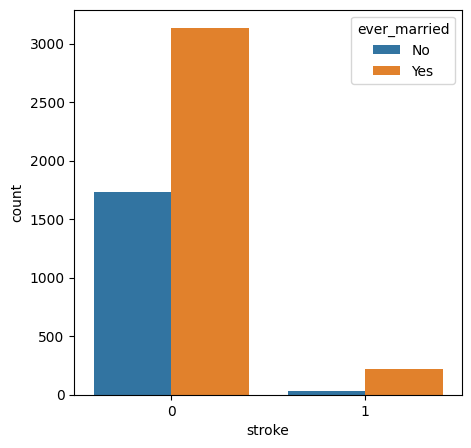

In [ ]:
# Comparing stroke with married status
sns.countplot(x='stroke', hue='ever_married', data=data)

The plot shows that married people with strokes outnumber unmarried people with strokes by 10 to 12 times, indicating that most stroke patients are married.

# Label Encoding

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data.

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [ ]:
gender=enc.fit_transform(data['gender'])

In [ ]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [ ]:
work_type=enc.fit_transform(data['work_type'])

In [ ]:
Residence_type=enc.fit_transform(data['Residence_type'])

In [ ]:
ever_married=enc.fit_transform(data['ever_married'])

In [ ]:
data['work_type']=work_type
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


# **Correlation matrix**

<Axes: >

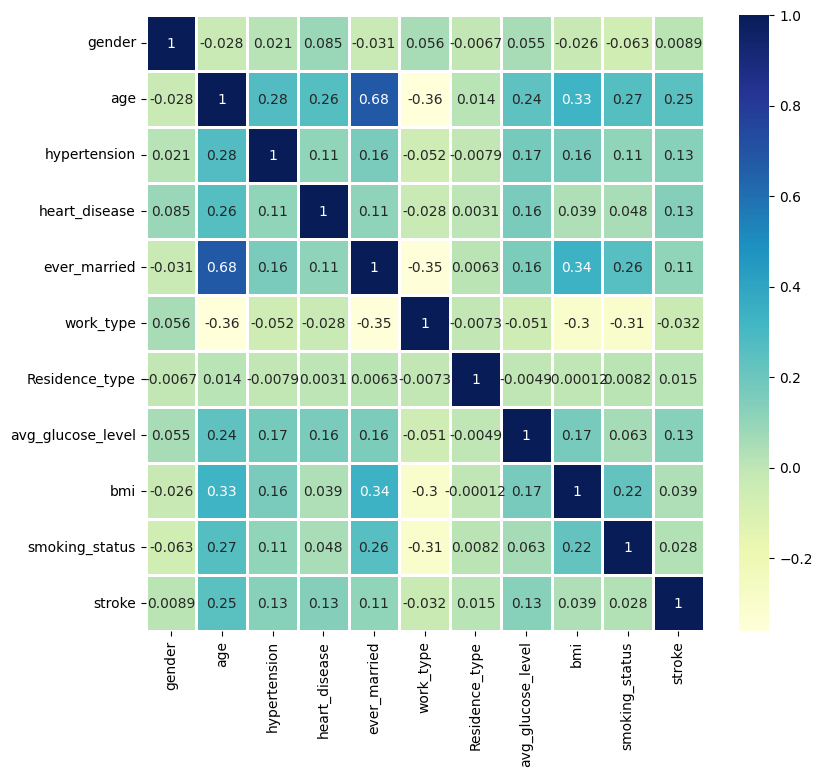

In [ ]:
# Correlation matrix between the attributes in the dataset to find if any attributes are correlated
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

*   We can see that Age is the most significant factor affecting the occurence of a stroke.



# Splitting the data for train and test

Train test split is a model validation procedure that allows you to simulate how a model would perform on new/unseen data.
We split here in the ratio 80 for training and 20 for testing.
X ---> train_X, test_X
Y ---> train_Y, test_Y

In [ ]:
X=data.drop('stroke',axis=1)

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [ ]:
Y=data['stroke']

In [ ]:
Y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2285,1,49.0,0,0,1,2,0,79.64,28.893237,3
4733,1,67.0,0,0,1,2,0,83.16,25.500000,1
3905,1,78.0,0,0,1,2,1,208.85,24.400000,1
4700,1,47.0,0,0,1,2,0,110.14,30.500000,3
4939,0,59.0,0,0,1,2,1,71.08,28.100000,2
...,...,...,...,...,...,...,...,...,...,...
1180,0,62.0,0,0,1,2,0,82.57,36.000000,1
3441,0,59.0,0,0,1,3,1,90.06,28.900000,3
1344,1,47.0,0,0,1,2,0,86.37,39.200000,3
4623,1,25.0,0,0,1,0,1,166.38,23.100000,2


In [ ]:
Y_train

,stroke
2285,0
4733,0
3905,0
4700,0
4939,0
...,...
1180,0
3441,0
1344,0
4623,0


In [ ]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2413,0,58.00,0,0,1,2,0,100.42,39.500000,3
1141,1,57.00,0,0,1,2,0,90.06,29.800000,0
146,1,65.00,0,0,1,3,1,68.43,28.893237,1
3883,0,1.64,0,0,0,4,1,69.89,18.100000,0
1044,0,79.00,0,0,1,0,1,93.89,30.400000,2
...,...,...,...,...,...,...,...,...,...,...
2261,1,59.00,0,0,1,2,1,60.35,25.900000,1
4712,1,57.00,0,0,1,2,1,93.04,29.200000,2
4971,0,63.00,0,0,1,2,1,57.06,37.900000,2
2224,1,57.00,0,0,1,2,0,76.28,31.400000,1


In [ ]:
Y_test

,stroke
2413,0
1141,0
146,1
3883,0
1044,0
...,...
2261,0
4712,0
4971,0
2224,0


# Normalization

In [ ]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [ ]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [ ]:
X_train_std

array([[ 1.19359699,  0.2521852 , -0.33069968, ..., -0.58626884,
         0.00238781,  1.51158251],
       [ 1.19359699,  1.04686385, -0.33069968, ..., -0.50843521,
        -0.44065504, -0.35191245],
       [ 1.19359699,  1.5325008 , -0.33069968, ...,  2.27080023,
        -0.58427812, -0.35191245],
       ...,
       [ 1.19359699,  0.16388757, -0.33069968, ..., -0.43745625,
         1.34810513,  1.51158251],
       [ 1.19359699, -0.80738634, -0.33069968, ...,  1.33171097,
        -0.75401449,  0.57983503],
       [-0.83780372,  1.62079843, -0.33069968, ..., -0.74171498,
        -0.16646553,  0.57983503]])

# Training

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [ ]:
dt.feature_importances_

array([0.03669544, 0.18679926, 0.01927101, 0.02369712, 0.03345309,
       0.04564986, 0.03973124, 0.28076484, 0.27334053, 0.0605976 ])

In [ ]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [ ]:
Y_pred=dt.predict(X_test_std)

In [ ]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# accuracy score
from sklearn.metrics import accuracy_score

In [ ]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [ ]:
ac_dt

0.9070450097847358

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [ ]:
Y_pred_lr=lr.predict(X_test_std)

In [ ]:
Y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)

In [ ]:
ac_lr

0.9383561643835616

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [ ]:
Y_pred=knn.predict(X_test_std)

In [ ]:
ac_knn=accuracy_score(Y_test,Y_pred)

In [ ]:
ac_knn

0.9344422700587084

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [ ]:
Y_pred=rf.predict(X_test_std)

In [ ]:
ac_rf=accuracy_score(Y_test,Y_pred)

In [ ]:
ac_rf

0.9373776908023483

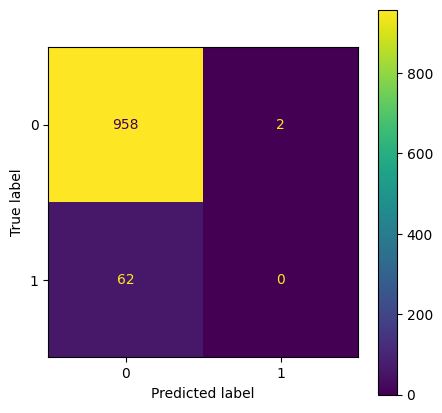

In [ ]:
# Plotting the confusion matrix

disp = ConfusionMatrixDisplay.from_estimator(rf, X_test_std, Y_test)

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv=SVC()

In [ ]:
sv.fit(X_train_std,Y_train)

SVC()

In [ ]:
Y_pred=sv.predict(X_test_std)

In [ ]:
ac_sv=accuracy_score(Y_test,Y_pred)

In [ ]:
ac_sv

0.9393346379647749

# XGBoost

In [ ]:
from xgboost  import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train_std,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test_std)

In [ ]:
y_pred_prob_xgb = xgb.predict_proba(X_test_std)[:, 1]

In [ ]:
ac_xgb = accuracy_score(Y_test, y_pred_xgb)
print('Accuracy:', ac_xgb)


Accuracy: 0.9363992172211351


In [ ]:
print('ROC AUC Score:', roc_auc_score(Y_test, y_pred_prob_xgb))

ROC AUC Score: 0.788978494623656


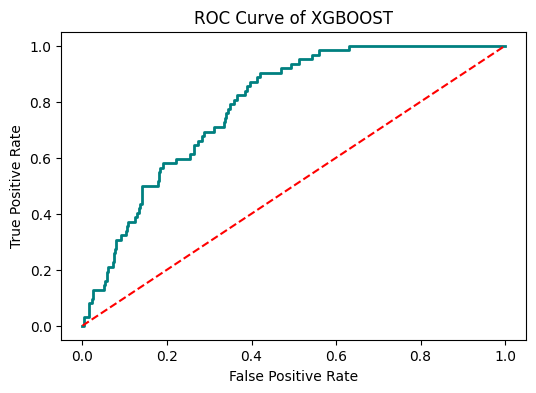

In [ ]:
# plots of roc_auc
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob_xgb)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve of XGBOOST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

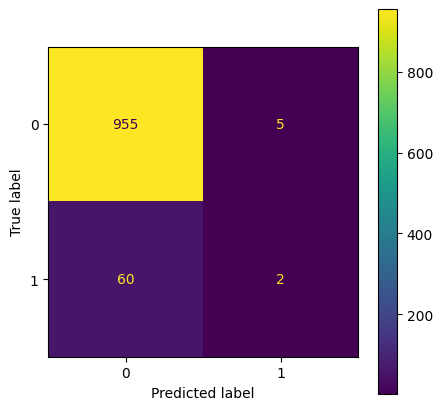

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(xgb, X_test_std, Y_test)



# AdaBoost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abClassifier = AdaBoostClassifier()
abClassifier.fit(X_train_std,Y_train)
ac_ab = abClassifier.score(X_train, Y_train)
print(ac_ab)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9542563600782779


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


# All Accuracies

In [ ]:
ac_dt

0.9070450097847358

In [ ]:
ac_lr

0.9383561643835616

In [ ]:
ac_knn

0.9344422700587084

In [ ]:
ac_rf

0.9373776908023483

In [ ]:
ac_sv

0.9393346379647749

In [ ]:
ac_xgb

0.9363992172211351

In [ ]:
ac_ab

0.9542563600782779

# Comparison

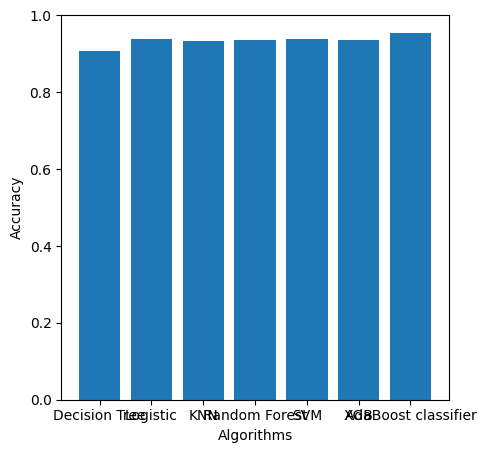

In [ ]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM', 'XGB', "AdaBoost classifier"],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv, ac_xgb, ac_ab])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Define the model list containing all your trained models
model = [dt, lr, knn, rf, sv, xgb,abClassifier]

for i in range(len(model)):
  print('Model ',model[i])
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test_std)) ) # Use X_test_std for normalized data
  #Another way to get the models accuracy on the test data
  print( accuracy_score(Y_test, model[i].predict(X_test_std))) # Use X_test_std for normalized data
  print()#Print a new line

Model  DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.13      0.10      0.11        62

    accuracy                           0.91      1022
   macro avg       0.54      0.53      0.53      1022
weighted avg       0.89      0.91      0.90      1022

0.9070450097847358

Model  LogisticRegression()
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

0.9383561643835616

Model  KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.93      102

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

0.9393346379647749

Model  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              mul